

---
* Needed Libraries :
---



In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, datasets
from sklearn.metrics import confusion_matrix
import seaborn as sns



---

* Definitation of Siamese network :

---



In [ ]:
def create_siamese_network(input_shape):

    input_image1 = layers.Input(shape=input_shape)
    input_image2 = layers.Input(shape=input_shape)

    conv1 = layers.Conv2D(32, (3, 3), activation='relu')
    pool1 = layers.MaxPooling2D((2, 2))
    conv2 = layers.Conv2D(64, (3, 3), activation='relu')
    pool2 = layers.MaxPooling2D((2, 2))
    conv3 = layers.Conv2D(128, (3, 3), activation='relu')
    flat = layers.Flatten()

    feature_extractor1 = flat(conv3(pool2(conv2(pool1(conv1(input_image1))))))
    feature_extractor2 = flat(conv3(pool2(conv2(pool1(conv1(input_image2))))))

    concatenated_features = layers.Concatenate()([feature_extractor1, feature_extractor2])

    dense1 = layers.Dense(256, activation='relu')(concatenated_features)
    output = layers.Dense(1, activation='sigmoid')(dense1)

    siamese_model = models.Model(inputs=[input_image1, input_image2], outputs=output)

    return siamese_model



---
---
## Trainig of Siamese Network using Different models and Optimizars :
---



* Training of Siamese Model using Hinge loss Function && SGD :

In [ ]:
def train_siamese_model_Binary_SGD(siamese_model, tr_pairs, tr_y, te_pairs, te_y, epochs=10, batch_size=128):
    siamese_model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
    history = siamese_model.fit([tr_pairs[:, 0], tr_pairs[:, 1]], tr_y, batch_size=batch_size, epochs=epochs, validation_data=([te_pairs[:, 0], te_pairs[:, 1]], te_y))
    return history




---

* Main Function :      

  *  Data set preperation  .

  *  Extracting patches from images , and pass it to Siamese network .

  * training Siamese model using different losses functions and Optimizers .

  * Calculating the loss and accuary of training and testing data .

  * plotting the losss and accuracy of training and testing data .

  * Evaluating the models.

  * plotting the Confusion Matrix .




---



output From training Siamese Model using Binary_crossentropy loss and SGD optimizer
Epoch 1/10
782/782 [==============================] - 266s 339ms/step - loss: 0.6932 - accuracy: 0.5060 - val_loss: 0.6930 - val_accuracy: 0.5059
Epoch 2/10
782/782 [==============================] - 260s 332ms/step - loss: 0.6928 - accuracy: 0.5116 - val_loss: 0.6924 - val_accuracy: 0.5116
Epoch 3/10
782/782 [==============================] - 252s 322ms/step - loss: 0.6921 - accuracy: 0.5238 - val_loss: 0.6918 - val_accuracy: 0.5015
Epoch 4/10
782/782 [==============================] - 261s 334ms/step - loss: 0.6902 - accuracy: 0.5434 - val_loss: 0.6893 - val_accuracy: 0.5105
Epoch 5/10
782/782 [==============================] - 259s 331ms/step - loss: 0.6833 - accuracy: 0.5672 - val_loss: 0.6768 - val_accuracy: 0.5757
Epoch 6/10
782/782 [==============================] - 258s 330ms/step - loss: 0.6711 - accuracy: 0.5843 - val_loss: 0.6673 - val_accuracy: 0.5871
Epoch 7/10
782/782 [====================

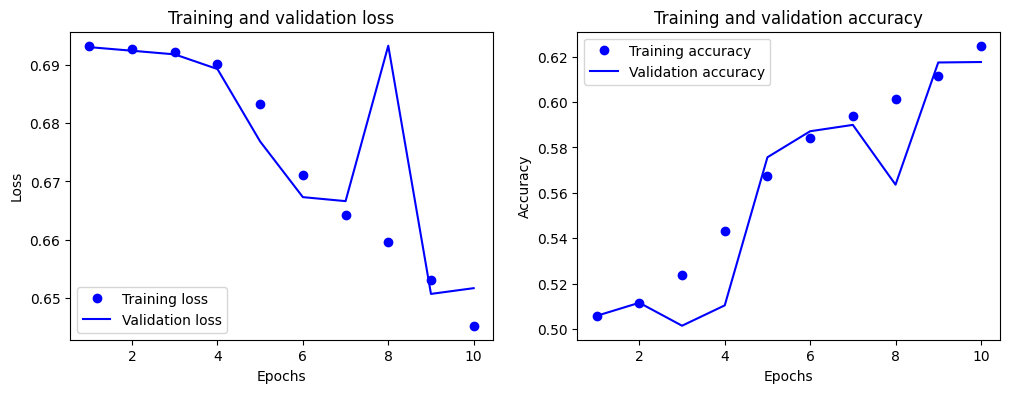

Evaluating the Siamese Model for test data 
625/625 [==============================] - 16s 26ms/step - loss: 0.6517 - accuracy: 0.6176
Test Loss: 0.6516899466514587
Test Accuracy: 61.76176071166992
Confusion Matrix for the test data 
625/625 [==============================] - 18s 29ms/step


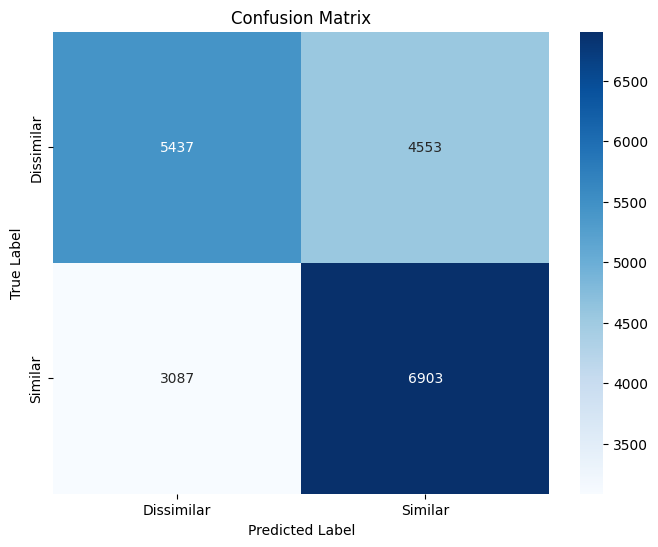

In [ ]:
# Main function
def main():
    # Load CIFAR-10 dataset
    (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    ###########################################################################################################################
    # Prepare training and testing data
    def create_pairs(x, y):
        def create_pairs(x, digit_indices):
            pairs = []
            labels = []
            n = min([len(digit_indices[d]) for d in range(10)]) - 1
            for d in range(10):
                for i in range(n):
                    z1, z2 = digit_indices[d][i], digit_indices[d][i+1]
                    pairs.append([x[z1], x[z2]])
                    inc = np.random.randint(1, 10)
                    dn = (d + inc) % 10
                    z1, z2 = digit_indices[d][i], digit_indices[dn][i]
                    pairs.append([x[z1], x[z2]])
                    labels += [1, 0]
            return np.array(pairs), np.array(labels)
        digit_indices = [np.where(y == i)[0] for i in range(10)]
        pairs, labels = create_pairs(x, digit_indices)
        return pairs, labels

   ###########################################################################################################################
    # Plot training and validation curves for the curves for the training of Siamese Model
    def plot_curves(history):
        train_loss = history.history['loss']
        train_accuracy = history.history['accuracy']
        val_loss = history.history['val_loss']
        val_accuracy = history.history['val_accuracy']
        epochs = range(1, len(train_loss) + 1)

        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(epochs, train_loss, 'bo', label='Training loss')
        plt.plot(epochs, val_loss, 'b', label='Validation loss')
        plt.title('Training and validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(epochs, train_accuracy, 'bo', label='Training accuracy')
        plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.show()
  ###########################################################################################################################
    # Evaluate the Siamese model
    def evaluate_siamese_model_test(siamese_model, te_pairs, te_y):
        test_loss, test_accuracy = siamese_model.evaluate([te_pairs[:, 0], te_pairs[:, 1]], te_y)
        print("Test Loss:", test_loss)
        print("Test Accuracy:", test_accuracy*100)
        return test_loss, test_accuracy
 ###########################################################################################################################
    # Evaluate the Siamese model
    def evaluate_siamese_model_train(siamese_model, tr_pairs, tr_y):
        train_loss, train_accuracy = siamese_model.evaluate([tr_pairs[:, 0], tr_pairs[:, 1]], tr_y)
        print("Train Loss:", train_loss)
        print("Train Accuracy:", train_accuracy*100)
        return train_loss, train_accuracy
###########################################################################################################################
    # Plot confusion matrix
    def plot_confusion_matrix(siamese_model, te_pairs, te_y):
        y_pred = siamese_model.predict([te_pairs[:, 0], te_pairs[:, 1]]).flatten()
        y_pred = np.round(y_pred)
        cm = confusion_matrix(te_y, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Dissimilar', 'Similar'], yticklabels=['Dissimilar', 'Similar'])
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()
###########################################################################################################################
    # testing part for whole functionlities :
    tr_pairs, tr_y = create_pairs(x_train, y_train)
    te_pairs, te_y = create_pairs(x_test, y_test)
    ###########################################################################################################################
    # Create Siamese network model
    input_shape = (32, 32, 3)  # CIFAR-10 image dimensions
    siamese_network = create_siamese_network(input_shape)
    ###########################################################################################################################
    print("output From training Siamese Model using Binary_crossentropy loss and SGD optimizer")
    history_1= train_siamese_model_Binary_SGD(siamese_network, tr_pairs, tr_y, te_pairs, te_y)
   ###########################################################################################################################
    print("output From training Siamese Model using Hinge loss and SGD optimizer")
    plot_curves(history_1)
    ###########################################################################################################################
    print("Evaluating the Siamese Model for test data ")
    evaluate_siamese_model_test(siamese_network, te_pairs, te_y)
    ###########################################################################################################################
    print("Confusion Matrix for the test data ")
    plot_confusion_matrix(siamese_network, te_pairs, te_y)

if __name__ == "__main__":
    main()
